In [45]:
from functools import partial
import numpy as np
import os
import pandas as pd
import scipy

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib as mpl
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 1
%aimport util

save_fig = partial(util.save_fig, save=True)

In [46]:
dataset_raw = pd.read_csv(util.DATASET_SUBSET).set_index(['Country', 'Year'])
dataset = dataset_raw.copy()
dataset_raw_all = pd.read_csv(util.DATASET_ALL).set_index(['Country', 'Year'])
dataset_all = dataset_raw_all.copy()

In [47]:
def distplot(x, align='right', **kwargs):
    plt.figure(figsize=(4, 4))
    sns.histplot(x, kde=True, stat='probability', bins=20, **kwargs)
    pval = scipy.stats.normaltest(x, nan_policy='omit').pvalue
    x, ha = (0.95, 'right') if align == 'right' else (0.05, 'left')
    ptext = 'p-value = {:.2f}'.format(pval) if pval >= 0.01 else 'p-value < 0.01'
    plt.annotate(ptext, xy=(x, 0.95),
                 xycoords='axes fraction', ha=ha, va='top')
    plt.ylim(0, plt.ylim()[1] * 1.05)
    plt.tight_layout()

# ENI

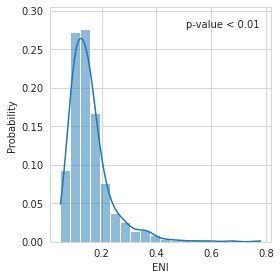

In [48]:
distplot(dataset_raw['ENI'])
save_fig('distplot_ENI.pdf')

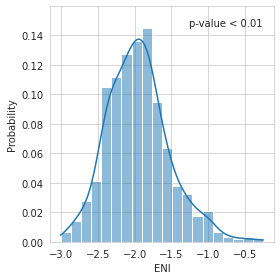

In [49]:
dataset['ENI'] = np.log(dataset_raw['ENI'])
dataset_all['ENI'] = np.log(dataset_raw_all['ENI'])

distplot(dataset['ENI'])
save_fig('distplot_lnENI.pdf')

# POP

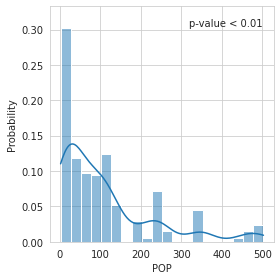

In [50]:
distplot(dataset_raw['POP'])
save_fig('distplot_POP.pdf')

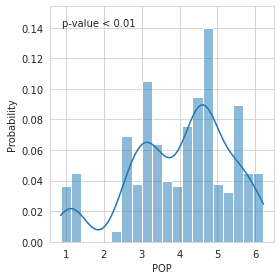

In [51]:
dataset['POP'] = np.log(dataset_raw['POP'])
dataset_all['POP'] = np.log(dataset_raw_all['POP'])

distplot(dataset['POP'], align='left')
save_fig('distplot_lnPOP.pdf')

# AFL

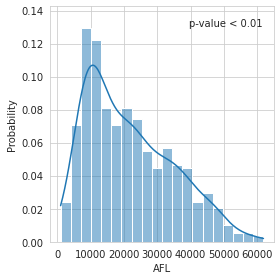

In [52]:
distplot(dataset_raw['AFL'])
save_fig('distplot_AFL.pdf')

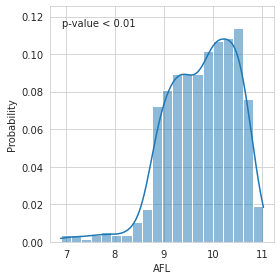

In [53]:
dataset['AFL'] = np.log(dataset_raw['AFL'])
dataset_all['AFL'] = np.log(dataset_raw_all['AFL'])

distplot(dataset['AFL'], align='left')
save_fig('distplot_lnAFL.pdf')

# URB

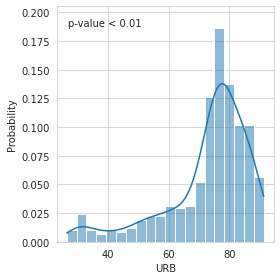

In [54]:
distplot(dataset_raw['URB'], align='left')
save_fig('distplot_URB.pdf')

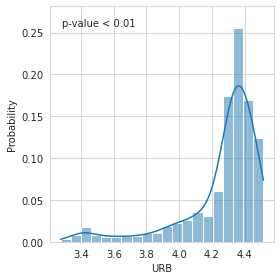

In [55]:
dataset['URB'] = np.log(dataset_raw['URB'])
dataset_all['URB'] = np.log(dataset_raw_all['URB'])

distplot(dataset['URB'], align='left')
save_fig('distplot_lnURB.pdf')

# TI

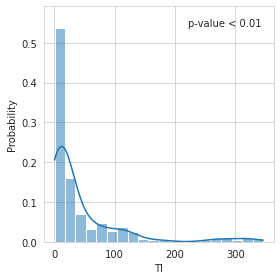

In [56]:
distplot(dataset_raw['TI'], align='right')
save_fig('distplot_TI.pdf')

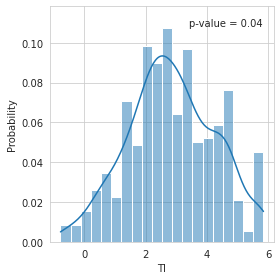

In [57]:
dataset['TI'] = np.log(dataset_raw['TI'])
dataset_all['TI'] = np.log(dataset_raw_all['TI'])

distplot(dataset['TI'], align='right')
save_fig('distplot_lnTI.pdf')

# TS

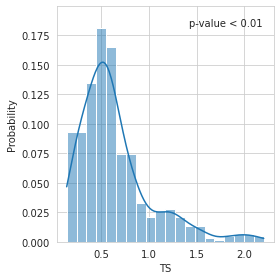

In [58]:
distplot(dataset_raw['TS'], align='right')
save_fig('distplot_TS.pdf')

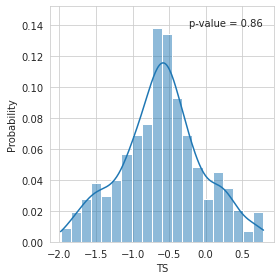

In [59]:
dataset['TS'] = np.log(dataset_raw['TS'])
dataset_all['TS'] = np.log(dataset_raw_all['TS'])

distplot(dataset['TS'], align='right')
save_fig('distplot_lnTS.pdf')

# CTS

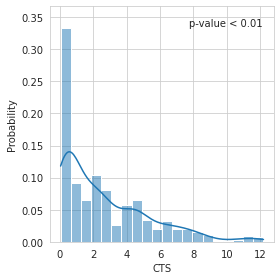

In [60]:
distplot(dataset_raw['CTS'], align='right')
save_fig('distplot_CTS.pdf')

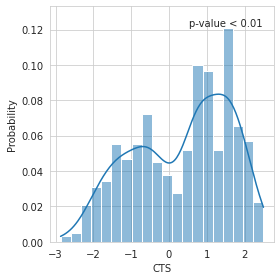

In [61]:
dataset['CTS'] = np.log(dataset_raw['CTS'])
dataset_all['CTS'] = np.log(dataset_raw_all['CTS'])

distplot(dataset['CTS'], align='right')
save_fig('distplot_lnCTS.pdf')

# KAOPEN

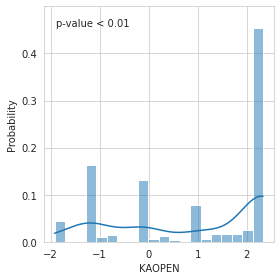

In [62]:
dataset['KAOPEN'] = dataset_raw['KAOPEN']
dataset_all['KAOPEN'] = dataset_raw_all['KAOPEN']

distplot(dataset_raw['KAOPEN'], align='left')
save_fig('distplot_KAOPEN.pdf')

In [63]:
dataset.to_csv(util.DATASET_SUBSET_FINAL)
dataset_all.to_csv(util.DATASET_ALL_FINAL)

In [64]:
idxs = dataset.index.intersection(dataset_all.index)
pd.testing.assert_frame_equal(dataset.loc[idxs], dataset_all.loc[idxs])

<AxesSubplot:>

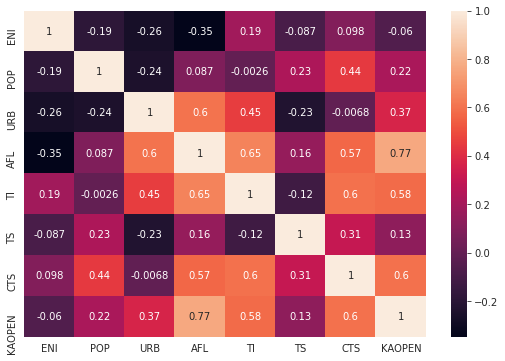

In [65]:
sns.heatmap(dataset.corr(), annot=True)

Text(0, 0.5, 'ENI (log kgoe per $GDP)')

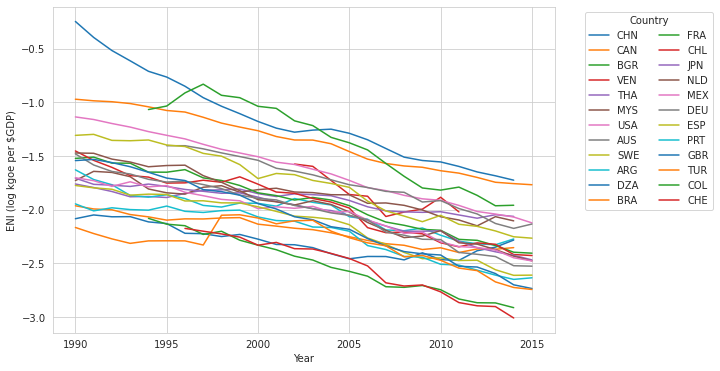

In [78]:
ENI = dataset.reset_index().pivot('Year', 'Country', 'ENI')
order = ENI.ffill().iloc[-1].sort_values(ascending=False).index
ENI[order].plot(legend=False)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.ylabel('ENI (log kgoe per $GDP)')

Text(0, 0.5, 'ENI (log kgoe per $GDP)')

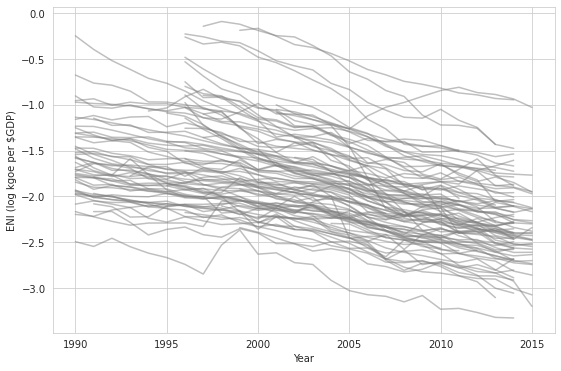

In [79]:
ENI = dataset_all.reset_index().pivot('Year', 'Country', 'ENI')
order = ENI.ffill().iloc[-1].sort_values(ascending=False).index
ENI[order].plot(legend=False, color='grey', alpha=0.5)
plt.ylabel('ENI (log kgoe per $GDP)')